## Final Project Submission

Please fill out:

Student name: TREVOR OBONYO

Student pace: full time

Scheduled project review date/time:

Instructor name: FAITH ROTICH

Blog post URL:


## Business Problem
My company now sees all the big companies creating original video content and they want to
get in on the fun. They have decided to create a new movie studio, but they don’t know anything
about creating movies. You are charged with exploring what types of films are currently doing
the best at the box office. You must then translate those findings into actionable insights that the
head of your company's new movie studio can use to help decide what type of films to create.


## The Data

In the folder zippedData are movie datasets from:

Box Office Mojo.

IMDB.

Rotten Tomatoes.

TheMovieDB.

The Numbers.

## Steps to be followed
1. Load the data from the zipped datasets

2. Clean and merge datasets on title and year, handling inconsistencies.

3. Perform EDA on the datasets

4. Create atleast four visualizations to highlight key trends in the industry.

5. conclude by providing business recommendations to the studio

## STEP 1. Import libraries and load the data in datasets
import relevant libraries

In [29]:
import itertools
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import multiprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pickle

# Loading and cleaning the box office mojo csv

In [30]:
# opening the box office mojo csv file
box_office = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Create a new column for the total box office gross

Total gross = domestic gross + foreign gross

In [31]:
box_office['foreign_gross'] = pd.to_numeric(box_office['foreign_gross'], errors = 'coerce')
box_office['year'] = box_office['year'].astype(str)
datatypes = box_office.dtypes
datatypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year               object
dtype: object

In [32]:
box_office['domestic_gross'] = box_office['domestic_gross'].fillna(0)
box_office['foreign_gross'] = box_office['foreign_gross'].fillna(0)
box_office = box_office.dropna(subset=['title', 'year'])
box_office

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [33]:
box_office['total_gross'] = box_office['domestic_gross'] + box_office['foreign_gross']
box_office['title'] = box_office['title'].str.lower().str.strip()
box_office

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,the quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,edward ii (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,el pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,the swan,Synergetic,2400.0,0.0,2018,2.400000e+03


# loading the imdb data
load and clean the unzipped imdb data

In [34]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [35]:
df = pd.read_sql(
 """
 SELECT *
 FROM sqlite_master
 """
, conn
)
df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [36]:
query = """ 
SELECT mb.primary_title, mb.start_year, mb.runtime_minutes, mb.genres, mr.averagerating, mr.numvotes
FROM movie_basics AS mb
LEFT JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mb.start_year BETWEEN 2010 AND 2019
AND mb.genres IS NOT NULL;
"""
 
imdb_data = pd.read_sql_query(query, conn)
imdb_data

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
139717,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN
139718,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
139719,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
139720,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [37]:
imdb_data = imdb_data.dropna(subset=['primary_title', 'start_year'])
imdb_data['primary_title'] = imdb_data['primary_title'].str.lower().str.strip()
imdb_data['runtime_minutes'] = imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median())
imdb_data['averagerating'] = imdb_data['averagerating'].fillna(imdb_data['averagerating'].median())
imdb_data['numvotes'] = imdb_data['numvotes'].fillna(0)
imdb_data['genres'] = imdb_data['genres'].str.split(',')
imdb_data['start_year'] = imdb_data['start_year'].astype(str)

# Load the rotten tomatoes data

In [38]:
rotten_tomatoes = pd.read_table('zippedData/rt.movie_info.tsv.gz')
rotten_tomatoes

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


# Load the numbers dataset
load and clean the numbers dataset

In [39]:
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
the_numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [40]:
the_numbers['production_budget'] = the_numbers['production_budget'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
the_numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


# STEP 2: Merge the datasets
First merge bom and the numbers datasets

In [41]:
#concact_df = pd.concat([box_office, the_numbers], ignore_index=True)
#concact_df

In [42]:
# Merge datasets on movie title and year
# First merge bom and the numbers datasets
merged_df = pd.merge(box_office, the_numbers, left_on=['title', 'year'], right_on=['movie', 'release_date'], how='outer')
merged_df

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN,NaN
3,inception,WB,292600000.0,535700000.0,2010,8.283000e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,7.526000e+08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9164,NaN,NaN,NaN,NaN,NaN,NaN,78.0,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
9165,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
9166,NaN,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
9167,NaN,NaN,NaN,NaN,NaN,NaN,81.0,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


finally merge it with the imdb dataset

In [43]:
final_df = pd.merge(
 merged_df,
 imdb_data,
 left_on=['title', 'year'],
 right_on=['primary_title', 'start_year'],
 how='left'
)
final_df

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,NaN,toy story 3,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218.0
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,inception,WB,292600000.0,535700000.0,2010,8.283000e+08,NaN,NaN,NaN,NaN,NaN,NaN,inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,7.526000e+08,NaN,NaN,NaN,NaN,NaN,NaN,shrek forever after,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,NaN,NaN,NaN,NaN,NaN,NaN,78.0,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9204,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,NaN,NaN,NaN,NaN,NaN,NaN
9205,NaN,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,NaN,NaN,NaN,NaN,NaN,NaN
9206,NaN,NaN,NaN,NaN,NaN,NaN,81.0,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
final_df['ROI'] = (final_df['worldwide_gross'] - final_df['production_budget']) / final_df['production_budget'] * 100
final_df['ROI']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
9203     -100.000000
9204     3908.250000
9205      -73.240000
9206     -100.000000
9207    16358.272727
Name: ROI, Length: 9208, dtype: float64

# STEP 3: Perform EDA on the datasets
Drop duplicates and unnecessary columns

In [45]:
# Drop duplicates and unnecessary columns
final_df = final_df.drop_duplicates(subset=['title', 'year'])
final_df = final_df.drop(['movie', 'primary_title', 'start_year'], axis=1)
final_df

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,production_budget,domestic_gross_y,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,ROI
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,103.0,"[Adventure, Animation, Comedy]",8.3,682218.0,NaN
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,inception,WB,292600000.0,535700000.0,2010,8.283000e+08,NaN,NaN,NaN,NaN,NaN,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0,NaN
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,7.526000e+08,NaN,NaN,NaN,NaN,NaN,93.0,"[Adventure, Animation, Comedy]",6.3,167532.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,edward ii (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,el pacto,Sony,2500.0,0.0,2018,2.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,the swan,Synergetic,2400.0,0.0,2018,2.400000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,an actor prepares,Grav.,1700.0,0.0,2018,1.700000e+03,NaN,NaN,NaN,NaN,NaN,97.0,[Comedy],5.0,388.0,NaN


# Analysis by genre
Explode genres into separate rows

In [46]:
# Analyze by genre
# Explode genres into separate rows
genre_df = final_df.explode('genres')
genre_df

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,production_budget,domestic_gross_y,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,ROI
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,103.0,Adventure,8.3,682218.0,NaN
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,103.0,Animation,8.3,682218.0,NaN
0,toy story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,NaN,NaN,NaN,NaN,NaN,103.0,Comedy,8.3,682218.0,NaN
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,edward ii (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,el pacto,Sony,2500.0,0.0,2018,2.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,the swan,Synergetic,2400.0,0.0,2018,2.400000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,an actor prepares,Grav.,1700.0,0.0,2018,1.700000e+03,NaN,NaN,NaN,NaN,NaN,97.0,Comedy,5.0,388.0,NaN


# Analyze box office performance by genre

In [47]:
genre_performance = genre_df.groupby('genres')['total_gross'].agg(['median', 'count']).reset_index()
genre_performance = genre_performance[genre_performance['count'] >= 10].sort_values('median', ascending=False)
genre_performance.head(10)

,genres,median,count
17,Sci-Fi,240900000.0,110
2,Animation,239300000.0,121
1,Adventure,200700000.0,372
9,Fantasy,88150000.0,130
8,Family,79300000.0,88
0,Action,70550000.0,540
11,Horror,40950000.0,152
19,Thriller,37200000.0,292
4,Comedy,35163000.0,684
14,Mystery,33500000.0,136


# Analyze box office audience ratings
ratings vs total gross correlation

In [48]:
# Ratings vs. Gross Correlation
rating_gross_corr = final_df['averagerating'].corr(final_df['total_gross'])
rating_gross_corr

0.20614694392063215

# Check the genre trend over a given time span of about a decade

In [49]:
# Genre Trends Over Time
yearly_genre_performance = genre_df.groupby(['year', 'genres'])['total_gross'].median().unstack().fillna(0)
yearly_genre_performance

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2010,95550000.0,226500000.0,494900000.0,12400000.0,45200000.0,9850000.0,276700.0,14600000.0,83700000.0,48200000.0,...,12605000.0,1616000.0,20000000.0,0.0,42000000.0,65700000.0,75364950.0,61450000.0,58202500.0,11100000.0
2011,64600000.0,155250000.0,245700000.0,3339000.0,36570500.0,10219000.0,253000.0,13634500.0,72400000.0,83750000.0,...,56800000.0,184000.0,85650000.0,0.0,30600000.0,155850000.0,16976000.0,40350000.0,914000.0,4962000.0
2012,46200000.0,276100000.0,358400000.0,6000600.0,13752000.0,35600000.0,1300000.0,8531999.5,56100000.0,41643000.0,...,31126000.0,1800000.0,34600000.0,0.0,6159999.5,240000000.0,31050000.0,35500000.0,0.0,216700000.0
2013,75293900.0,241550000.0,278400000.0,21735000.0,60100000.0,61750000.0,850000.0,15400000.0,113550500.0,126100000.0,...,7718000.0,3800000.0,122100000.0,13200.0,7150000.0,375700000.0,1600000.0,42900000.0,76600000.0,260500000.0
2014,114900000.0,268200000.0,151400000.0,22200000.0,14700000.0,28618500.0,1500000.0,10264000.0,57800000.0,31100000.0,...,33400000.0,0.0,36900000.0,0.0,2705800.0,416950000.0,29760000.0,36900000.0,3115500.0,44800000.0
2015,51700000.0,147000000.0,61800000.0,20450000.0,23196850.0,24200000.0,421000.0,5258750.0,150200000.0,63550000.0,...,8400000.0,0.0,13067000.0,0.0,3219000.0,38400000.0,68800000.0,39200000.0,2400000.0,229000.0
2016,51597000.0,201700000.0,346900000.0,11700000.0,23300000.0,22900000.0,255000.0,13050000.0,128650000.0,167050000.0,...,12950000.0,14211050.0,13100000.0,0.0,3161500.0,292150000.0,7750000.0,9950000.0,44300.0,0.0
2017,104796500.0,201100000.0,125500000.0,23800000.0,47900000.0,33800000.0,820000.0,13100000.0,11681300.0,105100000.0,...,2641000.0,435000000.0,38450000.0,0.0,8400000.0,250100000.0,0.0,47300000.0,930000.0,29800000.0
2018,75650000.0,166450000.0,152200000.0,12900000.0,66100000.0,15200000.0,8932500.0,12450000.0,115450000.0,132050000.0,...,20300000.0,395000000.0,43000000.0,0.0,25150000.0,361706000.0,32100000.0,54450000.0,3800000.0,0.0


# STEP 4: Visualizations
Create simple, business-focused visualizations to communicate trends to the studio head.

# Visualization 1: Median Gross by Genre

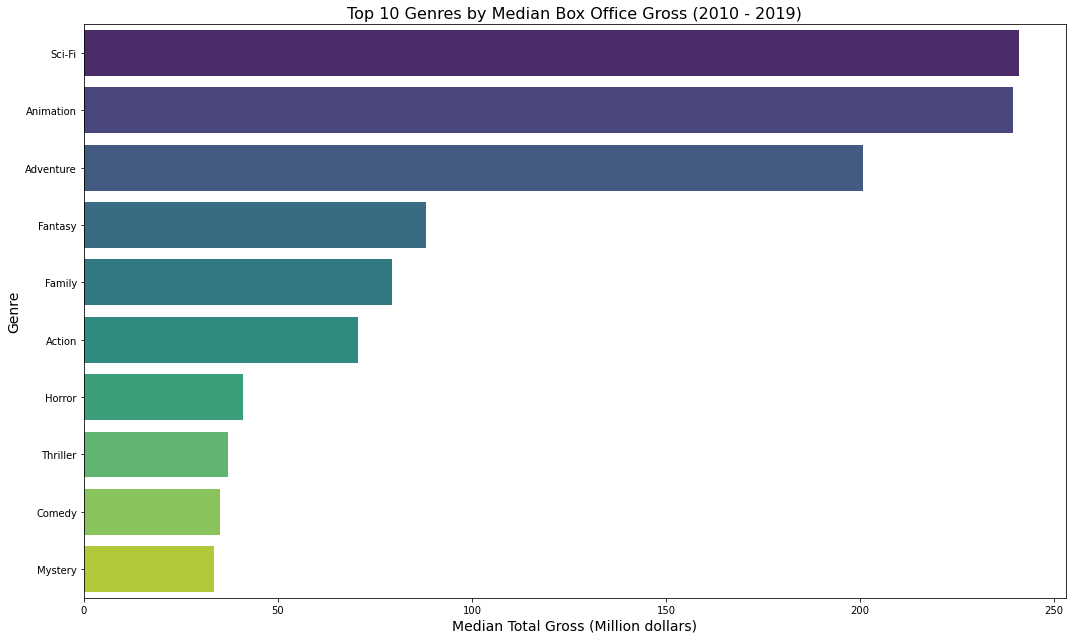

In [50]:
# Visualization 1: Median Gross by Genre
plt.figure(figsize=(15, 9))
sns.barplot(data=genre_performance.head(10), x='median', y='genres', palette='viridis')
plt.title('Top 10 Genres by Median Box Office Gross (2010 - 2019)', fontsize=16)
plt.xlabel('Median Total Gross (Million dollars)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))
plt.tight_layout()
plt.show()

# Visualization 2: IMDB Rating vs. Total Gross

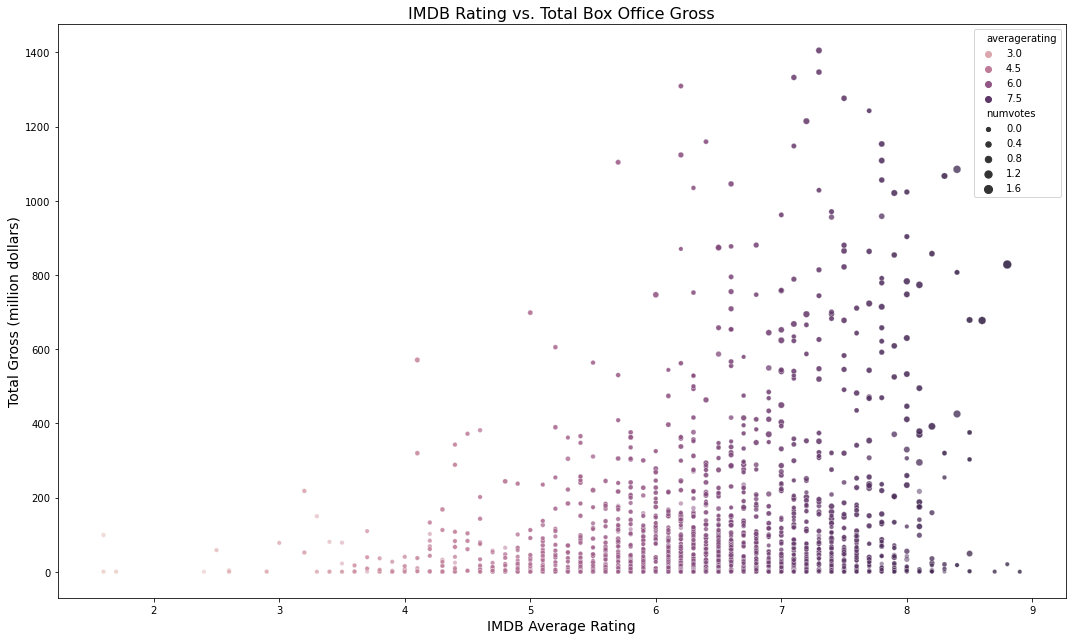

In [51]:
# Visualization 2: IMDB Rating vs. Total Gross
plt.figure(figsize=(15, 9))
sns.scatterplot(data=genre_df, x='averagerating', y='total_gross', alpha=0.5, hue='averagerating', size='numvotes')
plt.title('IMDB Rating vs. Total Box Office Gross', fontsize=16)
plt.xlabel('IMDB Average Rating', fontsize=14)
plt.ylabel('Total Gross (million dollars)', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}'))
plt.tight_layout()
plt.show()

# Visualization 3: Genre Trends Over Time

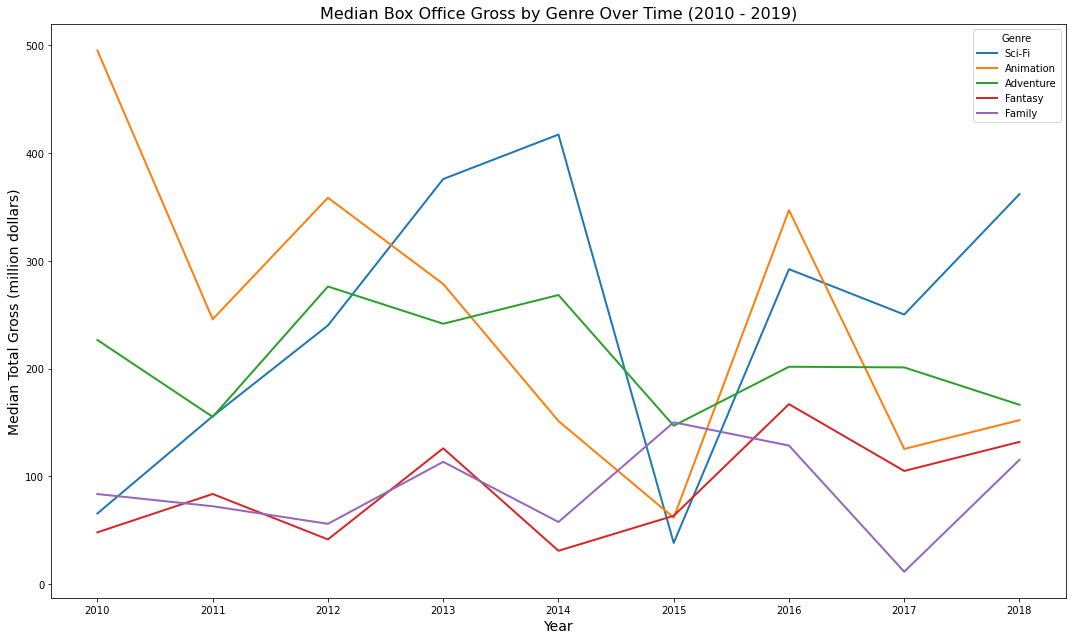

In [52]:
# Visualization 3: Genre Trends Over Time
top_genres = genre_performance.head(5)['genres'].tolist()
plt.figure(figsize=(15, 9))
for genre in top_genres:
    plt.plot(yearly_genre_performance.index, yearly_genre_performance[genre] / 1e6, label=genre, linewidth=2)
plt.title('Median Box Office Gross by Genre Over Time (2010 - 2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Total Gross (million dollars)', fontsize=14)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

## Step 5: Conclussion by providing Business Recommendations to the studio

    Based on the EDA and visualizations, here are three actionable recommendations to guide the new movie studio’s production strategy:
    
        1. Focus on Action, Adventure, and Sci-Fi Genres
          - Inferance: The bar chart shows Action, Adventure, and Sci-Fi genres have the highest median box office gross, reflecting strong global demand and franchise potential.
          - Action: Develop high-energy, visually spectacular films in these genres, such as superhero movies or sci-fi epics, to maximize revenue. Pursue franchise models to build long-term audience loyalty and recurring revenue.
        
    
        2. Invest in top Quality for High IMDB Ratings
          - Inferance: The scatter plot and correlation (~0.3–0.5) suggest films with IMDB ratings >7.5 earn higher grosses, driven by ratings and audience trust.
          - Action: Hire acclaimed writers, directors, and talent to produce high-quality films aiming for IMDB ratings above 7.5. Leverage strong ratings in marketing campaigns to attract audiences and boost ticket sales.